In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.stats.mstats import winsorize
from sqlalchemy import create_engine
import warnings

from scipy.stats import jarque_bera
from scipy.stats import normaltest
from scipy.stats import boxcox
from sklearn.preprocessing import normalize
from sklearn.preprocessing import scale

warnings.filterwarnings('ignore')
sns.set(style="whitegrid")

In [2]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'studentsperformance'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

student_performance = pd.read_sql_query('select * from studentsperformance',con=engine)

engine.dispose()

In [3]:
print(student_performance.head())
student_performance.info()
print(student_performance['math score'].isnull().sum())

   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
gender                         1000 non-null object
ra

In [4]:
jb_stats_math = jarque_bera(student_performance['math score'])
norm_stats_math = normaltest(student_performance['math score'])

jb_stats_reading = jarque_bera(student_performance['reading score'])
norm_stats_reading = normaltest(student_performance['reading score'])

jb_stats_writing = jarque_bera(student_performance['writing score'])
norm_stats_writing = normaltest(student_performance['writing score'])



In [5]:
print("Math score tests:")
print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats_math[0], jb_stats_math[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats_math[0], norm_stats_math[1]))

print("\nReading score tests:")
print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats_reading[0], jb_stats_reading[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats_reading[0], norm_stats_reading[1]))

print("\nWriting score tests:")
print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats_writing[0], jb_stats_writing[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats_writing[0], norm_stats_writing[1]))


Math score tests:
Jarque-Bera test statistics is 15.912256686712709 and p value is 0.0003505075386818213
Normality test statistics is 15.408960513931822 and p value is 0.00045080293869937836

Reading score tests:
Jarque-Bera test statistics is 11.383300575987892 and p value is 0.0033740202672214448
Normality test statistics is 11.11741279628622 and p value is 0.003853758403576582

Writing score tests:
Jarque-Bera test statistics is 13.98509448257235 and p value is 0.0009187033894586527
Normality test statistics is 13.606450837263859 and p value is 0.0011101885439899974


In [6]:
#student_performance['math score'] = student_performance['math score'].astype('str')
#student_performance['math score'] = student_performance['math score'].str.replace('0', '1')
#student_performance['math score'] = student_performance['math score'].astype('int')
student_performance['math score'] = student_performance['math score'].replace(0,1)

In [7]:
#student_performance['math score'] = student_performance['math score'].abs()

In [8]:
math_boxcox,_ = boxcox(student_performance['math score']) #why is this not working?
reading_boxcox,_ = boxcox(student_performance['reading score'])
writing_boxcox,_ = boxcox(student_performance['writing score'])

jb_stats_reading_box = jarque_bera(reading_boxcox)
norm_stats_reading_box = normaltest(reading_boxcox)

jb_stats_writing_box = jarque_bera(writing_boxcox)
norm_stats_writing_box = normaltest(writing_boxcox)

In [9]:
print("Math score tests:")
print("Jarque-Bera test statistics is {0} and p value is {1}".format(math_boxcox[0], math_boxcox[1]))
print("Normality test statistics is {0} and p value is {1}".format(math_boxcox[0], math_boxcox[1]))

print("\nReading score tests:")
print("Jarque-Bera test statistics is {0} and p value is {1}".format(reading_boxcox[0], reading_boxcox[1]))
print("Normality test statistics is {0} and p value is {1}".format(reading_boxcox[0], reading_boxcox[1]))

print("\nWriting score tests:")
print("Jarque-Bera test statistics is {0} and p value is {1}".format(writing_boxcox[0], writing_boxcox[1]))
print("Normality test statistics is {0} and p value is {1}".format(writing_boxcox[0], writing_boxcox[1]))


Math score tests:
Jarque-Bera test statistics is 207.29825869839453 and p value is 196.0027432386633
Normality test statistics is 207.29825869839453 and p value is 196.0027432386633

Reading score tests:
Jarque-Bera test statistics is 252.60869771274147 and p value is 342.99374200532685
Normality test statistics is 252.60869771274147 and p value is 342.99374200532685

Writing score tests:
Jarque-Bera test statistics is 271.18914060855985 and p value is 344.43901533794593
Normality test statistics is 271.18914060855985 and p value is 344.43901533794593


In [10]:
student_performance.loc[student_performance['math score'] <= 0]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score


In [11]:
student_performance['weighted_scores'] = (student_performance['math score'] + student_performance['reading score'] + student_performance['writing score'])/3

In [12]:
jb_stats_weighted = jarque_bera(student_performance['weighted_scores'])
norm_stats_weighted = normaltest(student_performance['weighted_scores'])

print("Weighted score tests:")
print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats_weighted[0], jb_stats_weighted[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats_weighted[0], norm_stats_weighted[1]))

Weighted score tests:
Jarque-Bera test statistics is 15.299648399479786 and p value is 0.0004761278250606793
Normality test statistics is 15.039484104419722 and p value is 0.0005422724257804356


In [13]:
weighted_boxcox = boxcox(student_performance['weighted_scores'])

print("Weighted box score tests:")
print("Jarque-Bera test statistics is {0} and p value is {1}".format(weighted_boxcox[0], weighted_boxcox[1]))
print("Normality test statistics is {0} and p value is {1}".format(weighted_boxcox[0], weighted_boxcox[1]))

Weighted box score tests:
Jarque-Bera test statistics is [295.90842303 352.93715936 416.99467396 171.22931735 317.19717091
 323.07684696 410.66184744 130.28024557 252.81382436 171.22931735
 197.96722838 150.35210012 297.82602571 299.74720448 192.86914343
 303.60025185 385.61365467  69.06627081 148.77893102 213.48903776
 258.32283321 280.69752027 176.15687    290.17716892 309.40640503
 297.82602571 222.25685595 282.58615887 271.30952657 275.0536423
 293.99440615 241.89954843 249.1602849  127.26681649 391.83286284
 340.90156739 334.92927853 213.48903776 365.09264556 208.27757751
 208.27757751 260.1667767  218.73750447 243.70890988 191.17834189
 218.73750447 229.34396833 286.37439309 275.0536423  354.95479423
 184.45836022 288.27396834 156.69219016 340.90156739 342.89909963
 122.78503124 365.09264556 184.45836022 216.98392708  15.78001274
 309.40640503 115.41940944 222.25685595 299.74720448 218.73750447
 247.33929013 125.76774827 273.17973043 216.98392708 191.17834189
 250.98513356 227.56

Text(0.5, 1.0, 'subsidized lunch')

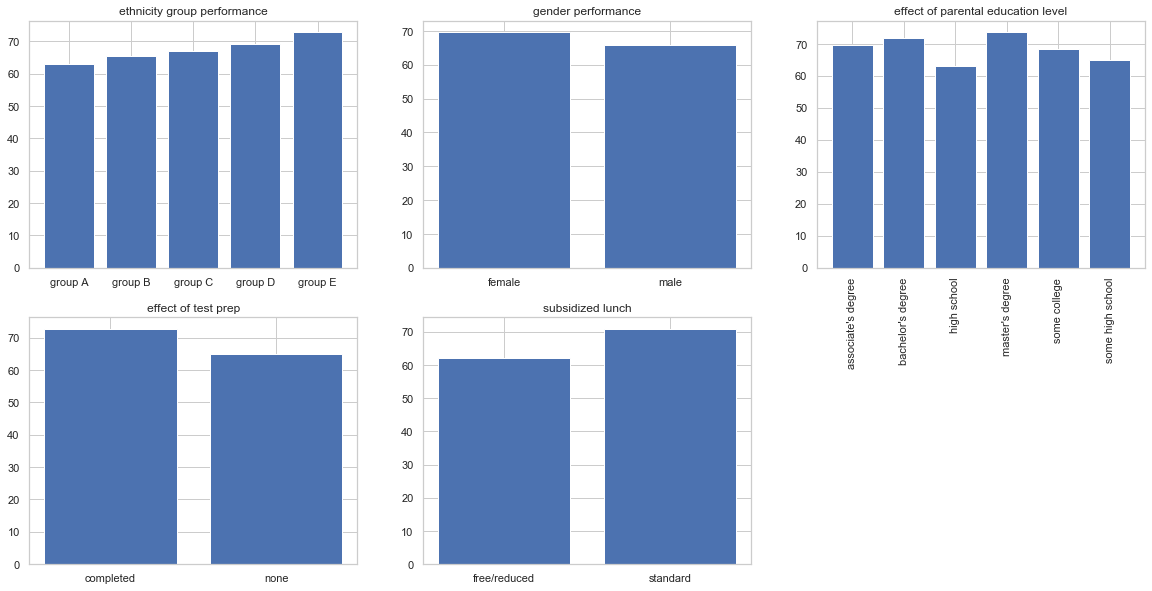

In [42]:

plt.figure(figsize=(20, 10))

plt.subplot(231)
plt.bar(student_performance.groupby('race/ethnicity')['weighted_scores'].mean().index,
       student_performance.groupby('race/ethnicity')['weighted_scores'].mean())
plt.title('ethnicity group performance')

plt.subplot(232)
plt.bar(student_performance.groupby('gender')['weighted_scores'].mean().index,
       student_performance.groupby('gender')['weighted_scores'].mean())
plt.title('gender performance')

plt.subplot(233)
plt.bar(student_performance.groupby('parental level of education')['weighted_scores'].mean().index,
       student_performance.groupby('parental level of education')['weighted_scores'].mean())
plt.title('effect of parental education level')
plt.xticks(rotation='vertical')

plt.subplot(234)
plt.bar(student_performance.groupby('test preparation course')['weighted_scores'].mean().index,
       student_performance.groupby('test preparation course')['weighted_scores'].mean())
plt.title('effect of test prep')


plt.subplot(235)
plt.bar(student_performance.groupby('lunch')['weighted_scores'].mean().index,
       student_performance.groupby('lunch')['weighted_scores'].mean())
plt.title('subsidized lunch')

I believe all variables would be important when looking at our new variable. each could lead to some insight. 